<a href="https://colab.research.google.com/github/Jit562/Churn-Prdiction-ANN-Deep-Learning/blob/main/Customer_Churn_Prediction_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **Import Keras Libarary**

In [333]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

### **Load Dataset**

In [334]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [335]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [336]:
df.shape

(10000, 14)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [338]:
df.duplicated().sum()

0

In [339]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [340]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


##### UnBlanced data of target data

In [341]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [342]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [343]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [344]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


### OneHotencoder

In [345]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [346]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [347]:
df['Gender_Male'].value_counts()

,count
Gender_Male,
True,5457
False,4543


In [348]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [349]:
df.corr()['Exited']

,Exited
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000
Geography_Germany,0.173488


In [350]:
columns=['Age','Balance','EstimatedSalary','Geography_Germany','Exited']

new_df = df[columns]

In [351]:
new_df.head()

,Age,Balance,EstimatedSalary,Geography_Germany,Exited
0,42,0.00,101348.88,False,1
1,41,83807.86,112542.58,False,0
2,42,159660.80,113931.57,False,1
3,39,0.00,93826.63,False,0
4,43,125510.82,79084.10,False,0


In [352]:
new_df['Age'].min()

18

In [353]:
new_df['Age'].max()

92

In [354]:
new_df['Balance'].min().round(2)

0.0

In [355]:
new_df['Balance'].max()

250898.09

In [356]:
new_df['EstimatedSalary'].min()

11.58

In [357]:
new_df['EstimatedSalary'].max()

199992.48

In [358]:
new_df = new_df[new_df['Balance'] != 0]

In [359]:
new_df.shape

(6383, 5)

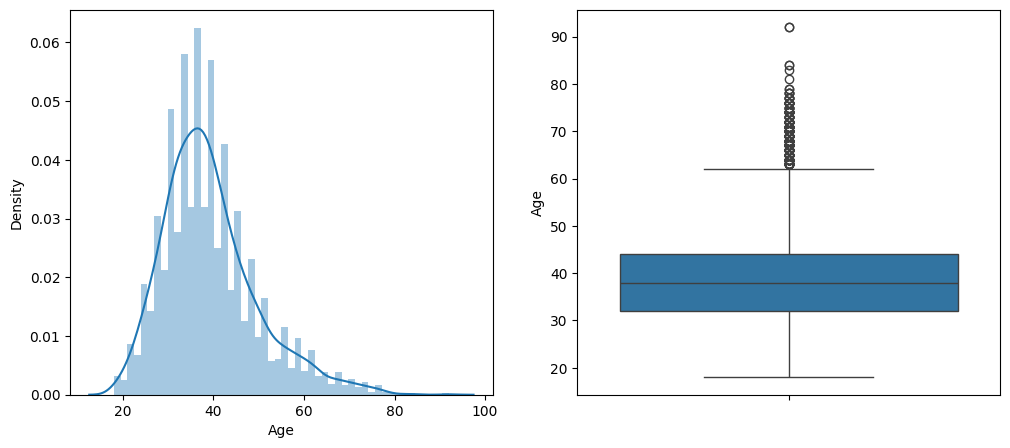

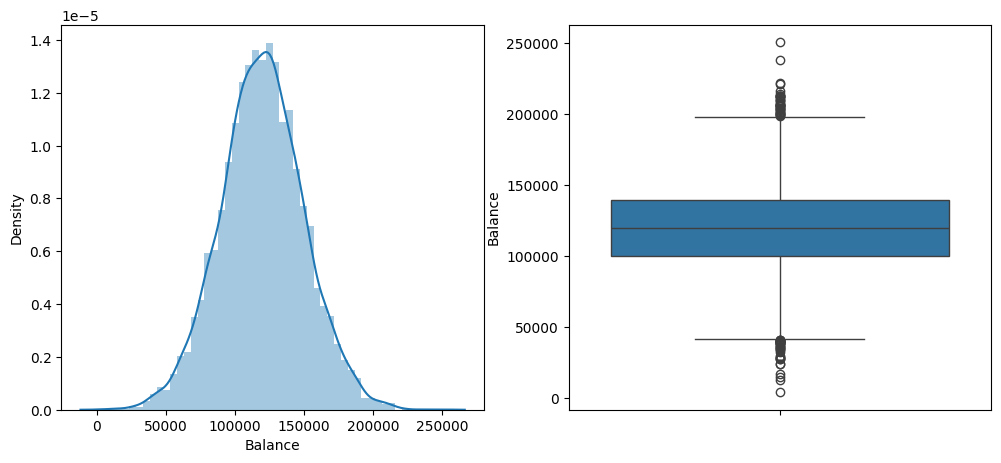

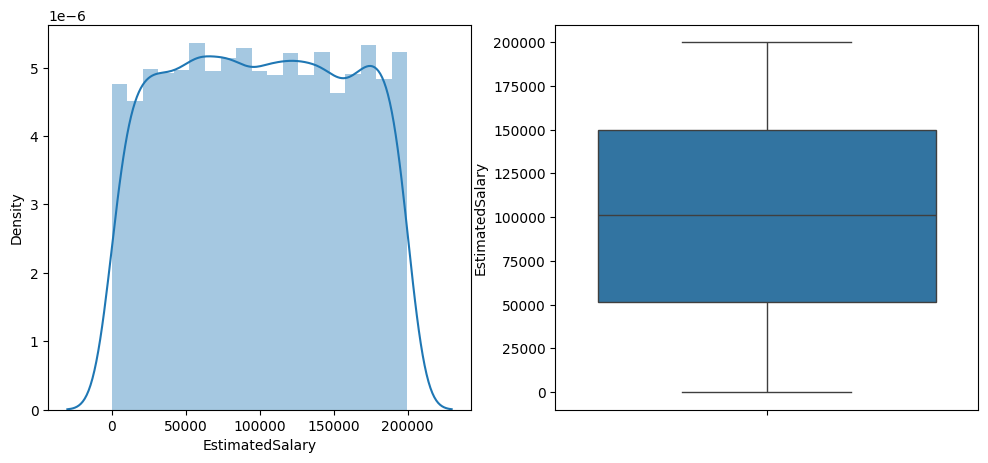

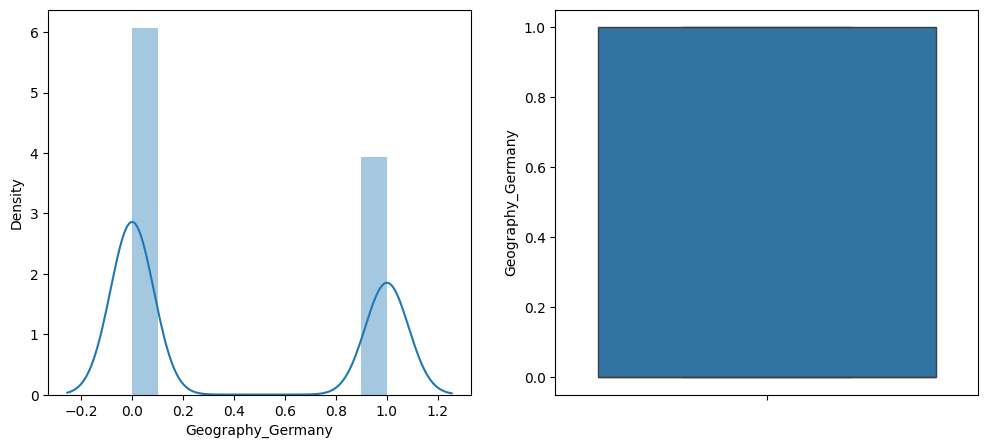

In [360]:
for col in new_df.columns:
  if col != 'Exited':
    plt.figure(figsize=(12,5))
    #Create subplot
    plt.subplot(1,2,1)
    sns.distplot(new_df[col])
    plt.subplot(1,2,2)
    sns.boxplot(new_df[col])
    plt.show()

In [361]:
#Remove Outlaiyer
Q1 = new_df['Age'].quantile(0.25)
Q3 = new_df['Age'].quantile(0.75)
IQR = Q3-Q1

upper_band = Q3 + 1.5*IQR
lower_band = Q1 - 1.5*IQR

new_df = new_df[(new_df['Age'] < upper_band) & (new_df['Age'] > lower_band)]

In [362]:
#Remove Outlaiyer
Q1 = new_df['Balance'].quantile(0.25)
Q3 = new_df['Balance'].quantile(0.75)
IQR = Q3-Q1

upper_band = Q3 + 1.5*IQR
lower_band = Q1 - 1.5*IQR

new_df = new_df[(new_df['Balance'] < upper_band) & (new_df['Balance'] > lower_band)]

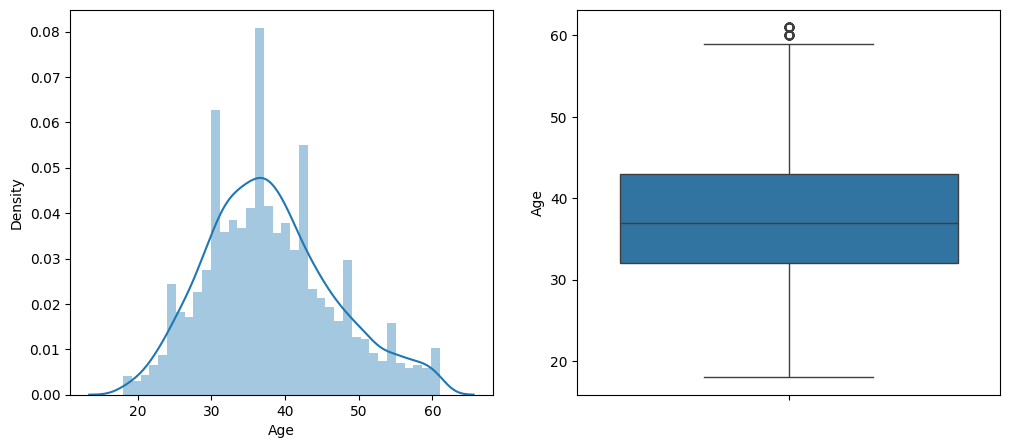

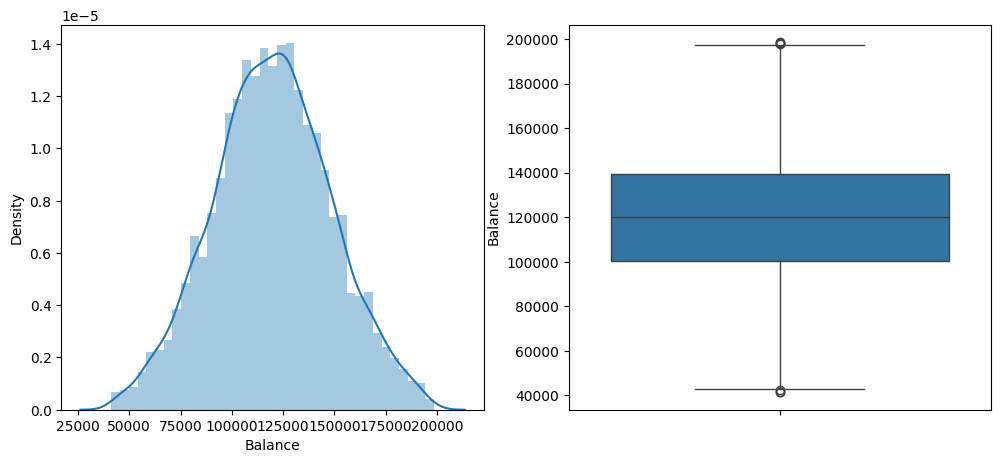

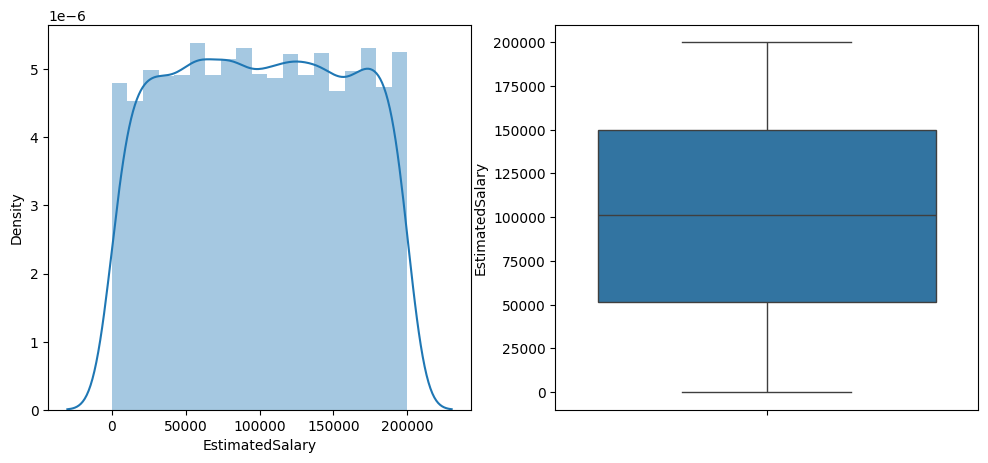

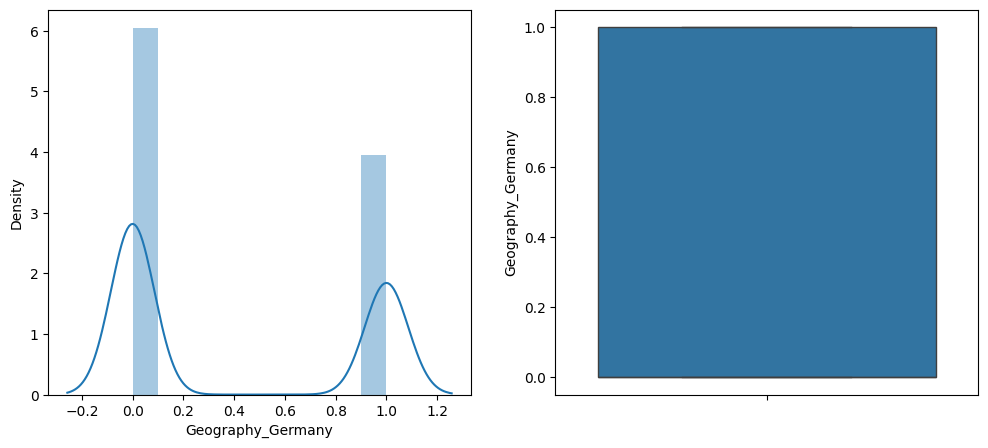

In [363]:
for col in new_df.columns:
  if col != 'Exited':
    plt.figure(figsize=(12,5))
    #Create subplot
    plt.subplot(1,2,1)
    sns.distplot(new_df[col])
    plt.subplot(1,2,2)
    sns.boxplot(new_df[col])
    plt.show()

In [364]:
new_df.shape

(6054, 5)

In [365]:
new_df['Exited'].value_counts()

,count
Exited,
0,4624
1,1430


In [366]:
new_df.head()

,Age,Balance,EstimatedSalary,Geography_Germany,Exited
1,41,83807.86,112542.58,False,0
2,42,159660.80,113931.57,False,1
4,43,125510.82,79084.10,False,0
5,44,113755.78,149756.71,False,1
7,29,115046.74,119346.88,True,1


In [367]:
new_df.corr()['Exited']

,Exited
Age,0.370703
Balance,0.009861
EstimatedSalary,0.004649
Geography_Germany,0.167438
Exited,1.000000


In [368]:
x = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

In [369]:
x.shape

(6054, 4)

In [370]:
y.shape

(6054,)

### Handling Inblanced data

In [371]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='auto')
x,y=smote.fit_resample(x,y)
y.value_counts()

,count
Exited,
0,4624
1,4624


### SPliting the data

In [372]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [373]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((7398, 4), (1850, 4), (7398,), (1850,))

### Scale the data

In [374]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Create the ANN model

In [375]:
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=4))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Model compile

In [376]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [377]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

### Fit the model

In [378]:
history = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.2, validation_data=(x_test, y_test))

Epoch 1/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5690 - loss: 0.6596 - val_accuracy: 0.7443 - val_loss: 0.5440
Epoch 2/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7366 - loss: 0.5467 - val_accuracy: 0.7541 - val_loss: 0.5237
Epoch 3/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7431 - loss: 0.5309 - val_accuracy: 0.7503 - val_loss: 0.5121
Epoch 4/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7378 - loss: 0.5327 - val_accuracy: 0.7546 - val_loss: 0.5054
Epoch 5/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7389 - loss: 0.5355 - val_accuracy: 0.7649 - val_loss: 0.5040
Epoch 6/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7569 - loss: 0.5128 - val_accuracy: 0.7643 - val_loss: 0.5015
Epoch 7/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7501 - loss: 0.5163 - val_accuracy: 0.7670 - val_loss: 0.5030
Epoch 8/20
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7592 - loss: 0.5097 - val_accuracy: 0.

In [379]:
model.layers[0].get_weights()

[array([[-0.8118662 ,  0.10927641,  0.49567866, -0.47911906,  0.14021483,
         -0.29266945,  0.24411526,  0.18069461,  0.6574821 ,  0.37675312,
         -0.10312615, -0.68863577,  0.4324117 , -0.6417334 , -0.5983848 ,
          0.658304  ],
        [ 0.5411914 , -0.33303666, -0.06485359, -0.22084634, -0.24742194,
         -0.3249069 , -0.76580614,  0.51770115, -0.13353157,  0.47076532,
          0.46194798,  0.34649247,  0.07687858, -0.50521874,  0.35519516,
          0.19620568],
        [ 0.3195901 , -0.3190108 ,  0.5023765 ,  0.5275987 ,  0.22569668,
         -0.47148284,  0.24454565,  0.27432638, -0.08122253,  0.01286169,
          0.16361743, -0.12026019,  0.05489176,  0.28351265, -0.14492187,
         -0.17901938],
        [ 0.4124119 , -0.53887916,  0.21524952, -0.5200919 ,  0.18542252,
          0.2807199 ,  0.43231744, -0.2272919 , -0.16536479,  0.40982684,
          0.51878726, -0.5902424 , -0.522114  ,  0.30923042,  0.29989725,
         -0.01576598]], dtype=float32),
 ar

In [380]:
predictation = model.predict(x_test)
predictation

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.8369284 ],
       [0.08569846],
       [0.89826196],
       ...,
       [0.67210025],
       [0.33023694],
       [0.14843285]], dtype=float32)

In [381]:
final_pred = np.where(predictation>0.5,1,0)
final_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [382]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test,final_pred), 2)

0.76

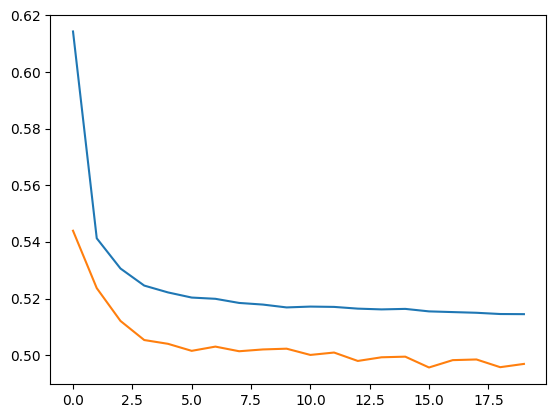

In [383]:
# loss function for train and test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

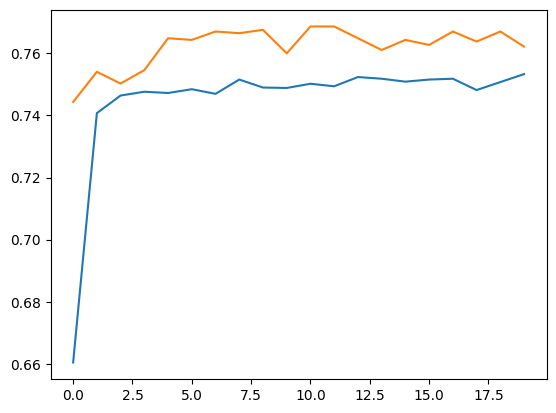

In [384]:
# accuracy score for trainand and test
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [385]:
!pip install keras-tuner --upgrade

In [386]:
import keras_tuner as kt
import keras


### Create the model using keras tuning

In [407]:
def build_model(hp):
  model = Sequential()

  units = hp.Int('units', min_value=8, max_value=128, step=8) #Create the number of neourens

  activation = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'leaky_relu']) # Activation function

  model.add(Dense(units=units, activation=activation, input_dim=4))

  #Dropout = hp.Choice('Dropout', values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) # Create dropout

  model.add(Dropout(hp.Choice('Dropout', values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))) #Add dropout

  model.add(Dense(1, activation='sigmoid'))

  optimizer = hp.Choice('optimizer', values = ['sgd','adam','rmsprop','adadelta'])   #Optimizer difiend

  loss = hp.Choice('loss', values = ['binary_crossentropy','categorical_crossentropy'])    #Loss function

  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

### Create tunner

In [408]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='curn', project_name='churn_pr')

### Fit the model

In [409]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.7427027225494385

Best val_accuracy So Far: 0.7437837719917297
Total elapsed time: 00h 00m 27s


In [410]:
tuner.get_best_hyperparameters()[0].values

{'units': 80,
 'activation': 'leaky_relu',
 'Dropout': 0.1,
 'optimizer': 'adam',
 'loss': 'binary_crossentropy'}

In [411]:
tuner.results_summary()

Results summary
Results in curn/churn_pr
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units: 80
activation: leaky_relu
Dropout: 0.1
optimizer: adam
loss: binary_crossentropy
Score: 0.7437837719917297

Trial 4 summary
Hyperparameters:
units: 64
activation: sigmoid
Dropout: 0.1
optimizer: rmsprop
loss: binary_crossentropy
Score: 0.7427027225494385

Trial 2 summary
Hyperparameters:
units: 8
activation: relu
Dropout: 0.1
optimizer: adam
loss: binary_crossentropy
Score: 0.7405405640602112

Trial 3 summary
Hyperparameters:
units: 40
activation: relu
Dropout: 0.5
optimizer: sgd
loss: categorical_crossentropy
Score: 0.5032432675361633

Trial 0 summary
Hyperparameters:
units: 16
activation: sigmoid
Dropout: 0.2
optimizer: adadelta
loss: binary_crossentropy
Score: 0.476756751537323


In [412]:
model = tuner.get_best_models(num_models=1)[0]

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

## **Create earlyStopping for epochs and handling overitting**

In [413]:
from keras.callbacks import EarlyStopping

In [414]:
callbacks = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=1,
)

In [415]:
model.fit(x_train, y_train, epochs=200, callbacks=callbacks, validation_data=(x_test, y_test))

Epoch 1/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7422 - loss: 0.5430 - val_accuracy: 0.7432 - val_loss: 0.5284
Epoch 2/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7441 - loss: 0.5385 - val_accuracy: 0.7405 - val_loss: 0.5254
Epoch 3/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7378 - loss: 0.5338 - val_accuracy: 0.7476 - val_loss: 0.5253
Epoch 4/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7395 - loss: 0.5378 - val_accuracy: 0.7486 - val_loss: 0.5222
Epoch 5/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7451 - loss: 0.5282 - val_accuracy: 0.7514 - val_loss: 0.5226
Epoch 6/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7473 - loss: 0.5277 - val_accuracy: 0.7535 - val_loss: 0.5216
Epoch 7/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7498 - loss: 0.5283 - val_accuracy: 0.7541 - val_loss: 0.5191
Epoch 8/200
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7394 - loss: 0.5333 - val_accu

In [416]:
model.evaluate(x_test, y_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7814 - loss: 0.4794


[0.5014957785606384, 0.7643243074417114]

In [417]:
model.layers[0].get_weights()

[array([[-0.3845114 ,  0.4095739 , -0.05637885, -0.34053153, -0.06463004,
         -0.01671578,  0.22215445,  0.15012166,  0.23801455,  0.04894625,
         -0.23026742,  0.1910453 ,  0.20041847, -0.03399853,  0.20184192,
          0.04200576, -0.37913638, -0.04943273, -0.01845793,  0.13619573,
         -0.27414677,  0.38875958,  0.01829665, -0.39557722,  0.07189859,
         -0.30466983,  0.10836315, -0.20503695,  0.47388035,  0.00274083,
          0.15871033,  0.00085863, -0.21825218, -0.06809343,  0.4856859 ,
         -0.01118716,  0.06018976,  0.04994044,  0.3897106 , -0.01440748,
          0.40869045, -0.05625446, -0.18329915, -0.02495513, -0.00435904,
          0.5087068 ,  0.08411068,  0.04424335, -0.18086956,  0.46821013,
          0.01253993,  0.24668136,  0.09877062, -0.31510955,  0.4310076 ,
          0.10528374,  0.21062468,  0.54700947,  0.04082058, -0.06172439,
          0.38255447,  0.05984974, -0.05922811, -0.00702129,  0.12341587,
          0.01194313,  0.03473731,  0.

In [418]:
pred = model.predict(x_test)
pred

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.8521849 ],
       [0.11660098],
       [0.90893006],
       ...,
       [0.6280122 ],
       [0.35688615],
       [0.18413958]], dtype=float32)

In [419]:
y_pred = np.where(pred>0.5,1,0)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       931
           1       0.76      0.77      0.76       919

    accuracy                           0.76      1850
   macro avg       0.76      0.76      0.76      1850
weighted avg       0.76      0.76      0.76      1850

[[708 223]
 [213 706]]
0.7643243243243243


### Extract the model

In [420]:
import pickle

pickle.dump(model, open('churn_pred.pkl','wb'))